In [74]:
import pandas as pd
import datetime

In [75]:
df=pd.read_json('data/likes_and_reactions/posts_and_comments.json')
print(df)

              timestamp                                               data  \
0   2020-03-25 23:35:54  [{'reaction': {'reaction': 'LOVE', 'actor': 'P...   
1   2019-12-21 16:17:35  [{'reaction': {'reaction': 'LIKE', 'actor': 'P...   
2   2019-08-12 12:40:35  [{'reaction': {'reaction': 'LIKE', 'actor': 'P...   
3   2019-06-20 18:54:47  [{'reaction': {'reaction': 'LOVE', 'actor': 'P...   
4   2019-06-07 20:55:51  [{'reaction': {'reaction': 'LIKE', 'actor': 'P...   
..                  ...                                                ...   
157 2015-07-04 11:39:07  [{'reaction': {'reaction': 'LIKE', 'actor': 'P...   
158 2015-04-26 11:52:57  [{'reaction': {'reaction': 'LIKE', 'actor': 'P...   
159 2015-04-07 12:22:44  [{'reaction': {'reaction': 'LIKE', 'actor': 'P...   
160 2015-04-02 09:26:46  [{'reaction': {'reaction': 'LIKE', 'actor': 'P...   
161 2015-03-04 15:48:14  [{'reaction': {'reaction': 'LIKE', 'actor': 'P...   

                                                 title  
0    P

In [76]:
df.columns

Index(['timestamp', 'data', 'title'], dtype='object')

In [77]:
df.rename(columns={'timestamp': 'date'}, inplace=True)
df = df.drop(['title'], axis=1)
pd.to_datetime(df['date'])

0     2020-03-25 23:35:54
1     2019-12-21 16:17:35
2     2019-08-12 12:40:35
3     2019-06-20 18:54:47
4     2019-06-07 20:55:51
              ...        
157   2015-07-04 11:39:07
158   2015-04-26 11:52:57
159   2015-04-07 12:22:44
160   2015-04-02 09:26:46
161   2015-03-04 15:48:14
Name: date, Length: 162, dtype: datetime64[ns]

In [78]:
df.columns

Index(['date', 'data'], dtype='object')

In [79]:
print(df)

                   date                                               data
0   2020-03-25 23:35:54  [{'reaction': {'reaction': 'LOVE', 'actor': 'P...
1   2019-12-21 16:17:35  [{'reaction': {'reaction': 'LIKE', 'actor': 'P...
2   2019-08-12 12:40:35  [{'reaction': {'reaction': 'LIKE', 'actor': 'P...
3   2019-06-20 18:54:47  [{'reaction': {'reaction': 'LOVE', 'actor': 'P...
4   2019-06-07 20:55:51  [{'reaction': {'reaction': 'LIKE', 'actor': 'P...
..                  ...                                                ...
157 2015-07-04 11:39:07  [{'reaction': {'reaction': 'LIKE', 'actor': 'P...
158 2015-04-26 11:52:57  [{'reaction': {'reaction': 'LIKE', 'actor': 'P...
159 2015-04-07 12:22:44  [{'reaction': {'reaction': 'LIKE', 'actor': 'P...
160 2015-04-02 09:26:46  [{'reaction': {'reaction': 'LIKE', 'actor': 'P...
161 2015-03-04 15:48:14  [{'reaction': {'reaction': 'LIKE', 'actor': 'P...

[162 rows x 2 columns]


In [80]:
df2 = df.set_index('date')
likes_counts = df2['data'].resample('MS').size()
likes_counts

date
2015-03-01     1
2015-04-01     3
2015-05-01     0
2015-06-01     0
2015-07-01    25
              ..
2019-11-01     0
2019-12-01     1
2020-01-01     0
2020-02-01     0
2020-03-01     1
Freq: MS, Name: data, Length: 61, dtype: int64

/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


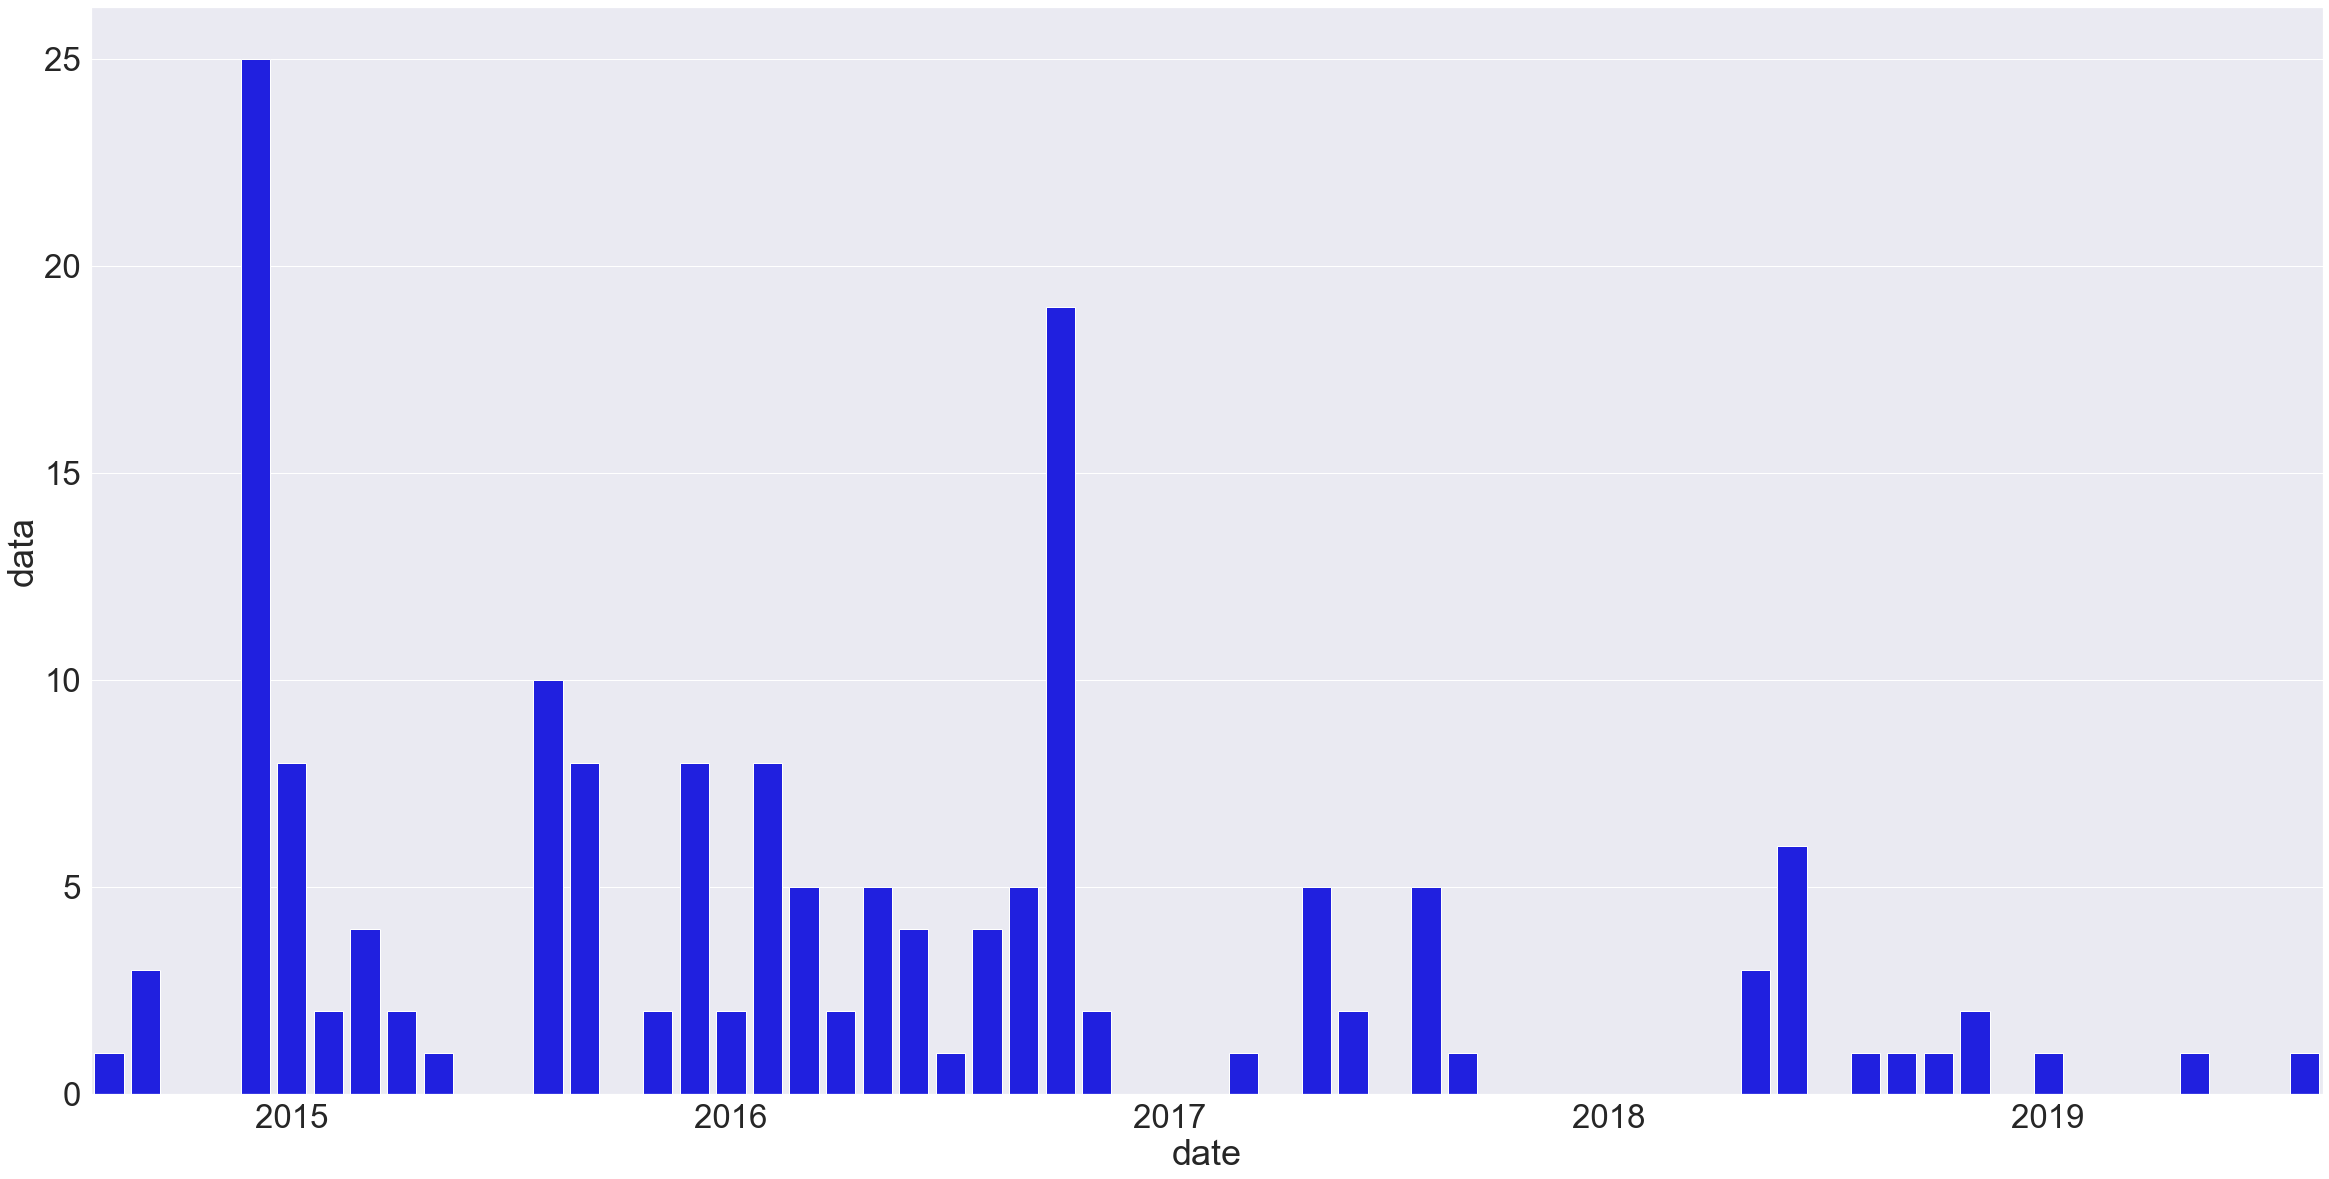

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# set figure size and font size
sns.set(rc={'figure.figsize':(40,20)})
sns.set(font_scale=3)

# set x labels
x_labels = likes_counts.index

#create bar plot
sns.barplot(x_labels, likes_counts, color="blue")

# only show x-axis labels for Jan 1 of every other year
tick_positions = np.arange(5, len(x_labels), step=12)

#reformat date to display year onlyplt.ylabel("post counts")
plt.xticks(tick_positions, x_labels[tick_positions].strftime("%Y"))

# display the plot
plt.show()

In [82]:
df1= pd.DataFrame(df)

In [83]:
df1.shape

(162, 2)

In [84]:
df1.columns

Index(['date', 'data'], dtype='object')

In [85]:
df1 = df1.set_index('date')

In [86]:
df1.head(5)

,data
date,
2020-03-25 23:35:54,"[{'reaction': {'reaction': 'LOVE', 'actor': 'P..."
2019-12-21 16:17:35,"[{'reaction': {'reaction': 'LIKE', 'actor': 'P..."
2019-08-12 12:40:35,"[{'reaction': {'reaction': 'LIKE', 'actor': 'P..."
2019-06-20 18:54:47,"[{'reaction': {'reaction': 'LOVE', 'actor': 'P..."
2019-06-07 20:55:51,"[{'reaction': {'reaction': 'LIKE', 'actor': 'P..."


In [87]:
df1['reaction']='no yet'

In [88]:
df1

,data,reaction
date,,
2020-03-25 23:35:54,"[{'reaction': {'reaction': 'LOVE', 'actor': 'P...",no yet
2019-12-21 16:17:35,"[{'reaction': {'reaction': 'LIKE', 'actor': 'P...",no yet
2019-08-12 12:40:35,"[{'reaction': {'reaction': 'LIKE', 'actor': 'P...",no yet
2019-06-20 18:54:47,"[{'reaction': {'reaction': 'LOVE', 'actor': 'P...",no yet
2019-06-07 20:55:51,"[{'reaction': {'reaction': 'LIKE', 'actor': 'P...",no yet
...,...,...
2015-07-04 11:39:07,"[{'reaction': {'reaction': 'LIKE', 'actor': 'P...",no yet
2015-04-26 11:52:57,"[{'reaction': {'reaction': 'LIKE', 'actor': 'P...",no yet
2015-04-07 12:22:44,"[{'reaction': {'reaction': 'LIKE', 'actor': 'P...",no yet


In [89]:
df1['data']= df1['data'].astype(str)

### These are the common Facebook reactions: 
#### love, like, wow, haha, sorry, anger

I can extract the reaction by selecting the dictionary and going inside the value, but as I already did it in the Post notebook, I will try something different

In [91]:
df1.loc[df1['data'].str.contains(pat='LOVE'), 'reaction'] = 'Love'
df1.loc[df1['data'].str.contains(pat='LIKE'), 'reaction'] = 'Like' 
df1.loc[df1['data'].str.contains(pat='WOW'), 'reaction'] = 'Wow' 
df1.loc[df1['data'].str.contains(pat='HAHA'), 'reaction'] = 'Haha' 
df1.loc[df1['data'].str.contains(pat='SORRY'), 'reaction'] = 'Sorry'
df1.loc[df1['data'].str.contains(pat='ANGER'), 'reaction'] = 'Anger' 

In [92]:
df1

,data,reaction
date,,
2020-03-25 23:35:54,"[{'reaction': {'reaction': 'LOVE', 'actor': 'P...",Love
2019-12-21 16:17:35,"[{'reaction': {'reaction': 'LIKE', 'actor': 'P...",Like
2019-08-12 12:40:35,"[{'reaction': {'reaction': 'LIKE', 'actor': 'P...",Like
2019-06-20 18:54:47,"[{'reaction': {'reaction': 'LOVE', 'actor': 'P...",Love
2019-06-07 20:55:51,"[{'reaction': {'reaction': 'LIKE', 'actor': 'P...",Like
...,...,...
2015-07-04 11:39:07,"[{'reaction': {'reaction': 'LIKE', 'actor': 'P...",Like
2015-04-26 11:52:57,"[{'reaction': {'reaction': 'LIKE', 'actor': 'P...",Like
2015-04-07 12:22:44,"[{'reaction': {'reaction': 'LIKE', 'actor': 'P...",Like


In [93]:
df1.loc[df1['reaction'].str.contains(pat='Love'), 'Love'] = '1'
df1.loc[df1['reaction'].str.contains(pat='Like'), 'Like'] = '1' 
df1.loc[df1['reaction'].str.contains(pat='Wow'), 'Wow'] = '1' 
df1.loc[df1['reaction'].str.contains(pat='Haha'), 'Haha'] = '1' 
df1.loc[df1['reaction'].str.contains(pat='Sorry'), 'Sorry'] = '1'
df1.loc[df1['reaction'].str.contains(pat='Anger'), 'Anger'] = '1' 

In [96]:
df5=df1.drop(['data'],axis=1)

In [97]:
df5.fillna('0')

,reaction,Love,Like,Wow,Haha,Sorry,Anger
date,,,,,,,
2020-03-25 23:35:54,Love,1,0,0,0,0,0
2019-12-21 16:17:35,Like,0,1,0,0,0,0
2019-08-12 12:40:35,Like,0,1,0,0,0,0
2019-06-20 18:54:47,Love,1,0,0,0,0,0
2019-06-07 20:55:51,Like,0,1,0,0,0,0
...,...,...,...,...,...,...,...
2015-07-04 11:39:07,Like,0,1,0,0,0,0
2015-04-26 11:52:57,Like,0,1,0,0,0,0
2015-04-07 12:22:44,Like,0,1,0,0,0,0


<Figure size 2880x576 with 0 Axes>

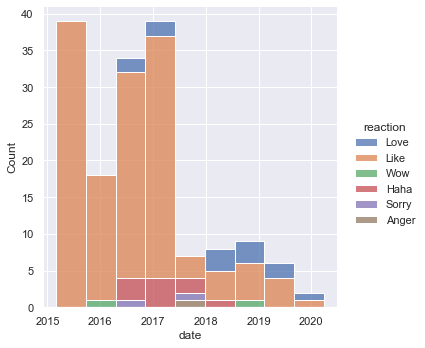

In [129]:
# set figure size and font size
fig = plt.gcf()
fig.set_size_inches(40, 8)

sns.set(font_scale=1)
sns.displot(df5, x="date", hue="reaction",multiple="stack")
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


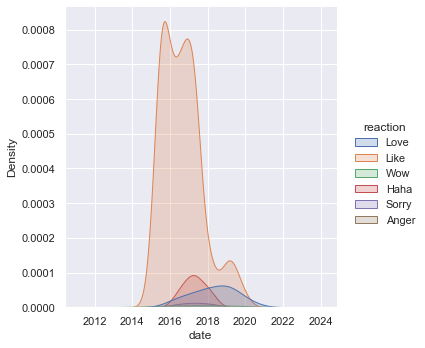

In [117]:
# set figure size and font size
sns.set()

sns.displot(df5, x="date", hue="reaction",kind="kde",fill=True)


# display the plot
plt.show()

In [49]:
reaction_counts = (df1['reaction']).resample('MS').size()
reaction_counts

date
2015-03-01     1
2015-04-01     3
2015-05-01     0
2015-06-01     0
2015-07-01    25
              ..
2019-11-01     0
2019-12-01     1
2020-01-01     0
2020-02-01     0
2020-03-01     1
Freq: MS, Name: reaction, Length: 61, dtype: int64

In [ ]:
# set figure size and font size
sns.set(rc={'figure.figsize':(40,20)})
sns.set(font_scale=3)

# set x labels
x_labels = reaction_counts.index

#create bar plot
sns.barplot(x_labels, reactions_counts, color="red")

# only show x-axis labels for Jan 1 of every other year
tick_positions = np.arange(5, len(x_labels), step=12)

#reformat date to display year onlyplt.ylabel("post counts")
plt.xticks(tick_positions, x_labels[tick_positions].strftime("%Y"))

# display the plot
plt.show()